In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Activation functions and their derivatives

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [3]:
def der_sigmoid(x):
  return sigmoid(x) * (1- sigmoid(x))

In [4]:
def relu(x):
  return np.maximum(0, x)

In [5]:
def der_relu(x):
  x = np.where(x < 0, 0, x)
  x = np.where(x >= 0, 1, x)
  return x

In [6]:
def tan(x):
  return np.tanh(x)

In [7]:
def der_tan(x):
  return 1 - np.square(np.tanh(x))

One Hot Encoding of Target Values

In [8]:
def one_hot(y):
  y_arr = [0]*10
  for i in range(10):
    if (y == i):
      y_arr[i] = 1
      break
  return y_arr 

Neural Network Functions

In [9]:
# function to initialise weights and biases randomly
def initialize_weights(structure):
  W = {}
  b = {}

  for i in range(1, len(structure)):
    W["W"+str(i)] = np.random.randn(structure[i], structure[i-1])
    b["b"+str(i)] = np.random.randn(structure[i], 1)
  
  return W, b

In [10]:
# function to initialise delta weights and biases with zeros having the same structure as the weights and biases
def initialize_delta_weights(structure):
  delta_W = {}
  delta_b = {}

  for i in range(1, len(structure)):
    delta_W["W"+str(i)] = np.zeros((structure[i], structure[i-1]))
    delta_b["b"+str(i)] = np.zeros((structure[i], 1))
  
  return delta_W, delta_b

In [11]:
# feed forward
# Z1 = W1.X + b1
# a1 = f(Z1)
# Z2 = W2.a1 + b2
# a2 = f(Z2)
def feed_forward(X, W, b, f):
  activations = {} # a
  weights = {} # z
  
  weights["z1"] = W["W1"]@X.T + b["b1"]
  activations["a1"] = f(weights["z1"])
  for i in range(2, len(W) + 1):
    weights["z"+str(i)] = W["W"+str(i)]@activations["a"+str(i-1)] + b["b"+str(i)]
    activations["a"+str(i)] = f(weights["z"+str(i)])
  
  return weights, activations

In [12]:
# back propoagation
def back_propagation(X, W, b, Z, A, f, der_f, y, structure):
  # retrieving the required params
  W1 = W["W1"]
  b1 = b["b1"]
  W2 = W["W2"]
  b2 = b["b2"]

  A1 = A["a1"]
  Z1 = Z["z1"]
  y_hat = A["a2"]
  Z2 = Z["z2"]

  current_batch_size = y.shape[0]
  # initializing back propagation gradients
  delta_W, delta_b = initialize_delta_weights(structure)

  dA2 = 2*(y_hat - y.T) # dE/dy_hat
  dZ2 = dA2 * der_f(Z2)
  dW2 = (1./current_batch_size) * np.matmul(dZ2, A1.T)
  delta_W["W2"] = dW2
  db2 = (1./current_batch_size) * np.sum(dZ2, axis=1, keepdims=True) # broadcasting
  delta_b["b2"] = db2

  dA1 = np.matmul(W2.T, dZ2)
  dZ1 = dA1 * der_f(Z1)
  dW1 = (1./current_batch_size) * np.dot(dZ1, X)
  delta_W["W1"] = dW1
  db1 = (1./current_batch_size) * np.sum(dZ1, axis=1, keepdims=True)
  delta_b["b1"] = db1

  return delta_W, delta_b


In [13]:
# updating the parameters
def update_params(delta_W, delta_b, W, b, learning_rate):
  W["W1"] -= learning_rate * delta_W["W1"]
  W["W2"] -= learning_rate * delta_W["W2"]
  b["b1"] -= learning_rate * delta_b["b1"]
  b["b2"] -= learning_rate * delta_b["b2"]
  return W, b

In [14]:
# training the model
# feed forward, back propagation, update parameters at each epoch
def train(X, y, structure, learning_rate, epochs, f, der_f):
  W, b = initialize_weights(structure)
  for epoch in range(epochs):
    Z, A = feed_forward(X, W, b, f)
    delta_W, delta_b = back_propagation(X, W, b, Z, A, f, der_f, y, structure)
    W, b = update_params(delta_W, delta_b, W, b, learning_rate)
  return W, b

In [15]:
# predicting the values for the test set based on the generated weights and biases
def predict(X, W, b, f):
    Z, A = feed_forward(X, W, b, f)
    return A['a2']

In [16]:
def accuracy(y_pred, y):
  correct = 0
  for i in range(len(y)):
    if np.argmax(y_pred[i]) == np.argmax(y[i]): # comparing the argmax for the predicted arrays and target arrays
      correct += 1
  return correct / len(y) * 100

Initialize Dataset

In [17]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Visualizing Dataset

<Figure size 640x480 with 0 Axes>

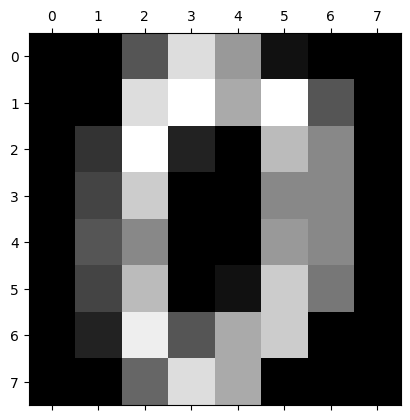

In [18]:
plt.gray()
plt.matshow(digits.images[0])

In [19]:
X = digits.data
y = digits.target

In [20]:
unique, counts = np.unique(y, return_counts=True)
df = pd.DataFrame({'Value': unique, 'Count': counts})
df

,Value,Count
0,0,178
1,1,182
2,2,177
3,3,183
4,4,181
5,5,182
6,6,181
7,7,179
8,8,174
9,9,180


Scaling Dataset

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)

Splitting Dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

Encoding the train and test y values

In [23]:
y_oneHot_train = []
for i in range(len(y_train)):
  y_oneHot_train.append(one_hot(y_train[i]))
y_oneHot_train = np.array(y_oneHot_train)

In [24]:
y_oneHot_test = []
for i in range(len(y_test)):
  y_oneHot_test.append(one_hot(y_test[i]))
y_oneHot_test = np.array(y_oneHot_test)

Activation Function 1a - Sigmoid<br>
Learning Rate - 0.4<br>
Epochs - 3000

In [25]:
structure = [64, 30, 10]
learning_rate = 0.4
epochs = 3000

In [26]:
W1, b1 = train(X_train, y_oneHot_train, structure, learning_rate, epochs, sigmoid, der_sigmoid)

In [27]:
# test accuracy
y_pred = predict(X_test, W1, b1, sigmoid)
print("Test Accuracy: ", accuracy(y_pred.T, y_oneHot_test))

Test Accuracy:  93.55555555555556


In [28]:
# Train Accuracy
y_pred_train = predict(X_train, W1, b1, sigmoid)
print("Train Accuracy: ", accuracy(y_pred_train.T, y_oneHot_train))

Train Accuracy:  98.06978470675575


Activation Function 1b - Sigmoid<br>
Learning Rate - 0.2<br>
Epochs - 5000

In [29]:
structure = [64, 30, 10]
learning_rate = 0.2
epochs = 5000

In [30]:
W2, b2 = train(X_train, y_oneHot_train, structure, learning_rate, epochs, sigmoid, der_sigmoid)

In [31]:
# test accuracy
y_pred2 = predict(X_test, W2, b2, sigmoid)
print("Test Accuracy: ", accuracy(y_pred2.T, y_oneHot_test))

Test Accuracy:  76.0


In [32]:
# train accuracy
y_pred_train2 = predict(X_train, W2, b2, sigmoid)
print("Train Accuracy: ", accuracy(y_pred_train2.T, y_oneHot_train))

Train Accuracy:  81.44023756495918


Activation Function 1c - Sigmoid<br>
Learning Rate - 0.8<br>
Epochs - 2000

In [33]:
structure = [64, 30, 10]
learning_rate = 0.8
epochs = 2000

In [34]:
W3, b3 = train(X_train, y_oneHot_train, structure, learning_rate, epochs, sigmoid, der_sigmoid)

In [35]:
# test accuracy
y_pred3 = predict(X_test, W3, b3, sigmoid)
print("Test Accuracy: ", accuracy(y_pred3.T, y_oneHot_test))

Test Accuracy:  93.11111111111111


In [36]:
# train accuracy
y_pred_train3 = predict(X_train, W3, b3, sigmoid)
print("Train Accuracy", accuracy(y_pred_train3.T, y_oneHot_train))

Train Accuracy 97.9955456570156


Activation Function 2a - Tanh<br>
Learning Rate - 0.6<br>
Epochs - 7500

In [37]:
learning_rate2 = 0.60
epochs2 = 7500

In [38]:
W4, b4 = train(X_train, y_oneHot_train, structure, learning_rate2, epochs2, tan, der_tan)

In [39]:
# test accuracy
y_pred4 = predict(X_test, W4, b4, tan)
print("Test Accuracy: ", accuracy(y_pred4.T, y_oneHot_test))

Test Accuracy:  91.11111111111111


In [40]:
# train accuracy
y_pred_train4 = predict(X_train, W4, b4, tan)
print("Train Accuracy: ", accuracy(y_pred_train4.T, y_oneHot_train))

Train Accuracy:  97.92130660727543


Activation Function 2b - Tanh<br>
Learning Rate - 0.999<br>
Epochs - 5000

In [41]:
learning_rate2 = 0.999
epochs2 = 5000

In [42]:
W5, b5 = train(X_train, y_oneHot_train, structure, learning_rate2, epochs2, tan, der_tan)

In [43]:
# test accuracy
y_pred5 = predict(X_test, W5, b5, tan)
print("Test Accuracy: ", accuracy(y_pred5.T, y_oneHot_test))

Test Accuracy:  87.1111111111111


In [44]:
# train accuracy
y_pred_train5 = predict(X_train, W5, b5, tan)
print("Train Accuracy: ", accuracy(y_pred_train5.T, y_oneHot_train))

Train Accuracy:  95.69413511507052


Activation Function 2c - Tanh<br>
Learning Rate - 0.8<br>
Epochs - 8000

In [45]:
learning_rate2 = 0.8
epochs2 = 8000

In [46]:
W6, b6 = train(X_train, y_oneHot_train, structure, learning_rate2, epochs2, tan, der_tan)

In [47]:
# test accuracy
y_pred6 = predict(X_test, W6, b6, tan)
print("Test Accuracy: ", accuracy(y_pred6.T, y_oneHot_test))

Test Accuracy:  88.22222222222223


In [48]:
# train accuracy
y_pred_train6 = predict(X_train, W6, b6, tan)
print("Train Accuracy: ", accuracy(y_pred_train6.T, y_oneHot_train))

Train Accuracy:  98.06978470675575


Activation Function 3a - Relu<br>
Learning Rate - 0.01<br>
Epochs - 10000

In [49]:
learning_rate3 = 0.01
epochs3 = 10000

In [50]:
W7, b7 = train(X_train, y_oneHot_train, structure, learning_rate3, epochs3, relu, der_relu)

In [51]:
# test accuracy
y_pred7 = predict(X_test, W7, b7, relu)
print("Test Accuracy: ", accuracy(y_pred7.T, y_oneHot_test))

Test Accuracy:  89.55555555555556


In [52]:
# train accuracy
y_pred_train7 = predict(X_train, W7, b7, relu)
print("Train Accuracy: ", accuracy(y_pred_train7.T, y_oneHot_train))

Train Accuracy:  92.72457312546399


Activation Function 3b - Relu<br>
Learning Rate - 0.001<br>
Epochs - 20000

In [53]:
learning_rate3 = 0.001
epochs3 = 20000

In [54]:
W8, b8 = train(X_train, y_oneHot_train, structure, learning_rate3, epochs3, relu, der_relu)

In [55]:
# test accuracy
y_pred8 = predict(X_test, W8, b8, relu)
print("Test Accuracy: ", accuracy(y_pred8.T, y_oneHot_test))

Test Accuracy:  75.1111111111111


In [56]:
# train accuracy
y_pred_train8 = predict(X_train, W8, b8, relu)
print("Train Accuracy: ", accuracy(y_pred_train8.T, y_oneHot_train))

Train Accuracy:  87.75055679287304


Activation Function 3c - Relu<br>
Learning Rate - 0.002<br>
Epochs - 17000

In [57]:
learning_rate3 = 0.002
epochs3 = 17000

In [58]:
W9, b9 = train(X_train, y_oneHot_train, structure, learning_rate3, epochs3, relu, der_relu)

In [59]:
# test accuracy
y_pred9 = predict(X_test, W9, b9, relu)
print("Test Accuracy: ", accuracy(y_pred9.T, y_oneHot_test))

Test Accuracy:  83.77777777777777


In [60]:
# train accuracy
y_pred_train9 = predict(X_train, W9, b9, relu)
print("Train Accuracy: ", accuracy(y_pred_train9.T, y_oneHot_train))

Train Accuracy:  92.87305122494432


**Sigmoid Function** <br>
Learning Rate: 0.4 <br>
Epochs: 3000<br>
Training Accuracy: 98.06978470675575<br>
Test Accuracy: 93.55555555555556<br>

Learning Rate: 0.2 <br>
Epochs: 5000<br>
Training Accuracy: 81.44023756495918<br>
Test Accuracy: 76.0<br>

Learning Rate: 0.8 <br>
Epochs: 2000<br>
Training Accuracy: 97.9955456570156<br>
Test Accuracy: 93.11111111111111<br>


**Tanh Function** <br>
Learning Rate: 0.6 <br>
Epochs: 7500<br>
Training Accuracy: 97.92130660727543<br>
Test Accuracy: 91.11111111111111<br>

Learning Rate: 0.999 <br>
Epochs: 5000<br>
Training Accuracy: 95.69413511507052<br>
Test Accuracy: 87.1111111111111<br>

Learning Rate: 0.8 <br>
Epochs: 8000<br>
Training Accuracy: 98.06978470675575<br>
Test Accuracy: 88.22222222222223<br>

**Relu Function** <br>
Learning Rate: 0.01 <br>
Epochs: 10000<br>
Training Accuracy: 92.72457312546399<br>
Test Accuracy: 89.55555555555556<br>

Learning Rate: 0.001 <br>
Epochs: 20000<br>
Training Accuracy: 87.75055679287304<br>
Test Accuracy: 75.1111111111111<br>

Learning Rate: 0.002 <br>
Epochs: 17000<br>
Training Accuracy: 92.87305122494432<br>
Test Accuracy: 83.77777777777777<br>